In [ ]:
#1.1 Load the dataset:
Use pandas to load the CSV file into a DataFrame.

In [4]:
import pandas as pd
import openpyxl

# Load the dataset
df = pd.read_csv(r"D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\EDA1\Cardiotocographic.csv")

# Display the first few rows of the dataset to understand its structure
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
#Handle missing values:
Check for missing data using isnull() and apply appropriate handling strategies (e.g., imputation, removal).

In [6]:
#Check for missing values
missing_data = df.isnull().sum()

# Handle missing values (example: fill missing values with mean or remove rows)
df.fillna(df.mean(), inplace=True)  # Example: Imputation with mean for numerical columns

In [ ]:
#1.3 Identify and correct data type inconsistencies:
Check the data types of each column and ensure they are appropriate (e.g., numerical columns should be of type float or int).

In [7]:
# Check data types of each column
df.dtypes

# Convert columns to the correct data type if necessary (e.g., numeric columns)
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')  # Example: Converting to numeric

In [ ]:
#1.4 Detect and treat outliers:
Outliers can distort statistical summaries and impact model performance. Use visualizations or statistical methods to detect them.

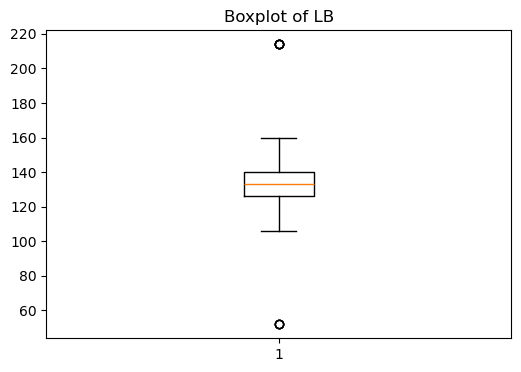

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Boxplot to visualize outliers for a numerical column (e.g., LB)
plt.figure(figsize=(6, 4))
plt.boxplot(df['LB'])
plt.title('Boxplot of LB')
plt.show()

# Handling outliers (example: clip values to certain range)
df['LB'] = np.clip(df['LB'], df['LB'].quantile(0.05), df['LB'].quantile(0.95))

In [ ]:
#Statistical Summary:
2.1 Statistical summary:
Use describe() to generate summary statistics for the dataset, including measures of central tendency and dispersion.

In [9]:
# Statistical summary of the dataset
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.374604,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,8.882624,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,119.000000,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,149.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
#2.2 Identify interesting findings:
Look for variables with skewed distributions, high variance, or outliers. These insights could reveal interesting patterns or issues with the dataset.

3. Data Visualization:
3.1 Visualizing distributions (histograms/boxplots):
Create histograms or boxplots to understand the distribution of each numerical variable.

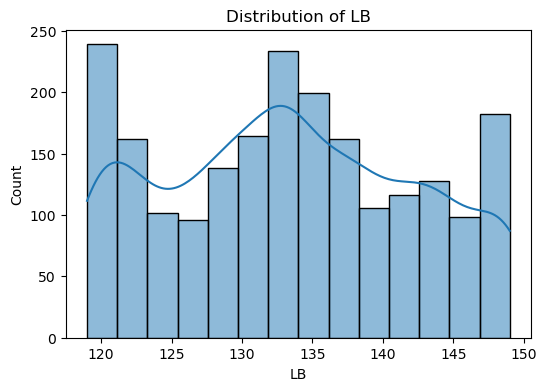

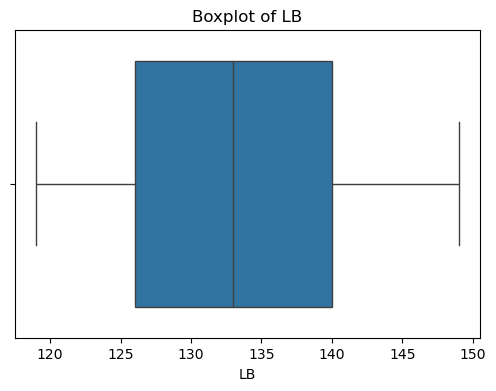

In [10]:
import seaborn as sns

# Histogram for a numerical variable (e.g., LB)
plt.figure(figsize=(6, 4))
sns.histplot(df['LB'], kde=True)
plt.title('Distribution of LB')
plt.show()

# Boxplot for the same variable to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['LB'])
plt.title('Boxplot of LB')
plt.show()

In [ ]:
#3.2 Visualizing category frequencies (bar chart/pie chart):
If there are categorical variables, display their distribution using bar charts or pie charts.

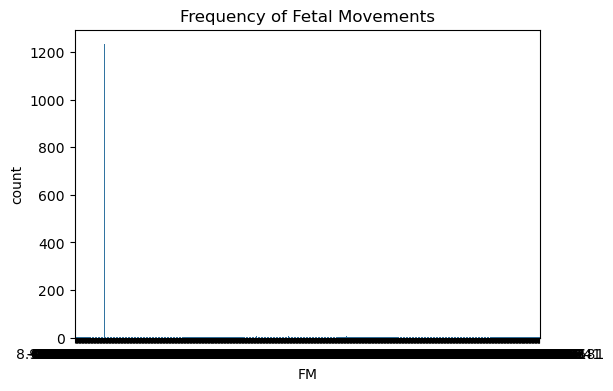

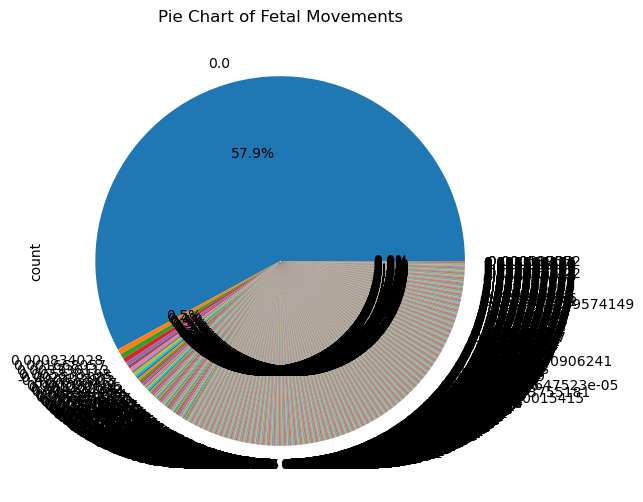

In [11]:
# Bar chart for categorical variable (e.g., FM if it's categorical)
plt.figure(figsize=(6, 4))
sns.countplot(x='FM', data=df)
plt.title('Frequency of Fetal Movements')
plt.show()

# Pie chart
df['FM'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Pie Chart of Fetal Movements')
plt.show()

In [ ]:
#3.3 Correlation heatmap:
Check relationships between numerical variables using a correlation matrix.

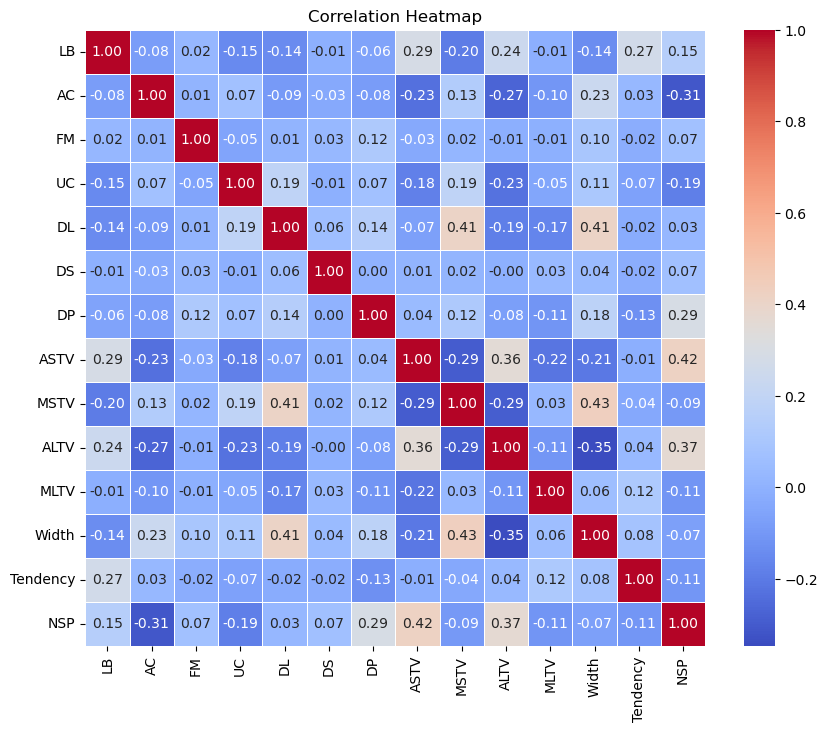

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#3.4 Pairplot or Violin plots:
For more in-depth analysis, use pair plots or violin plots to explore relationships between multiple variables at once.

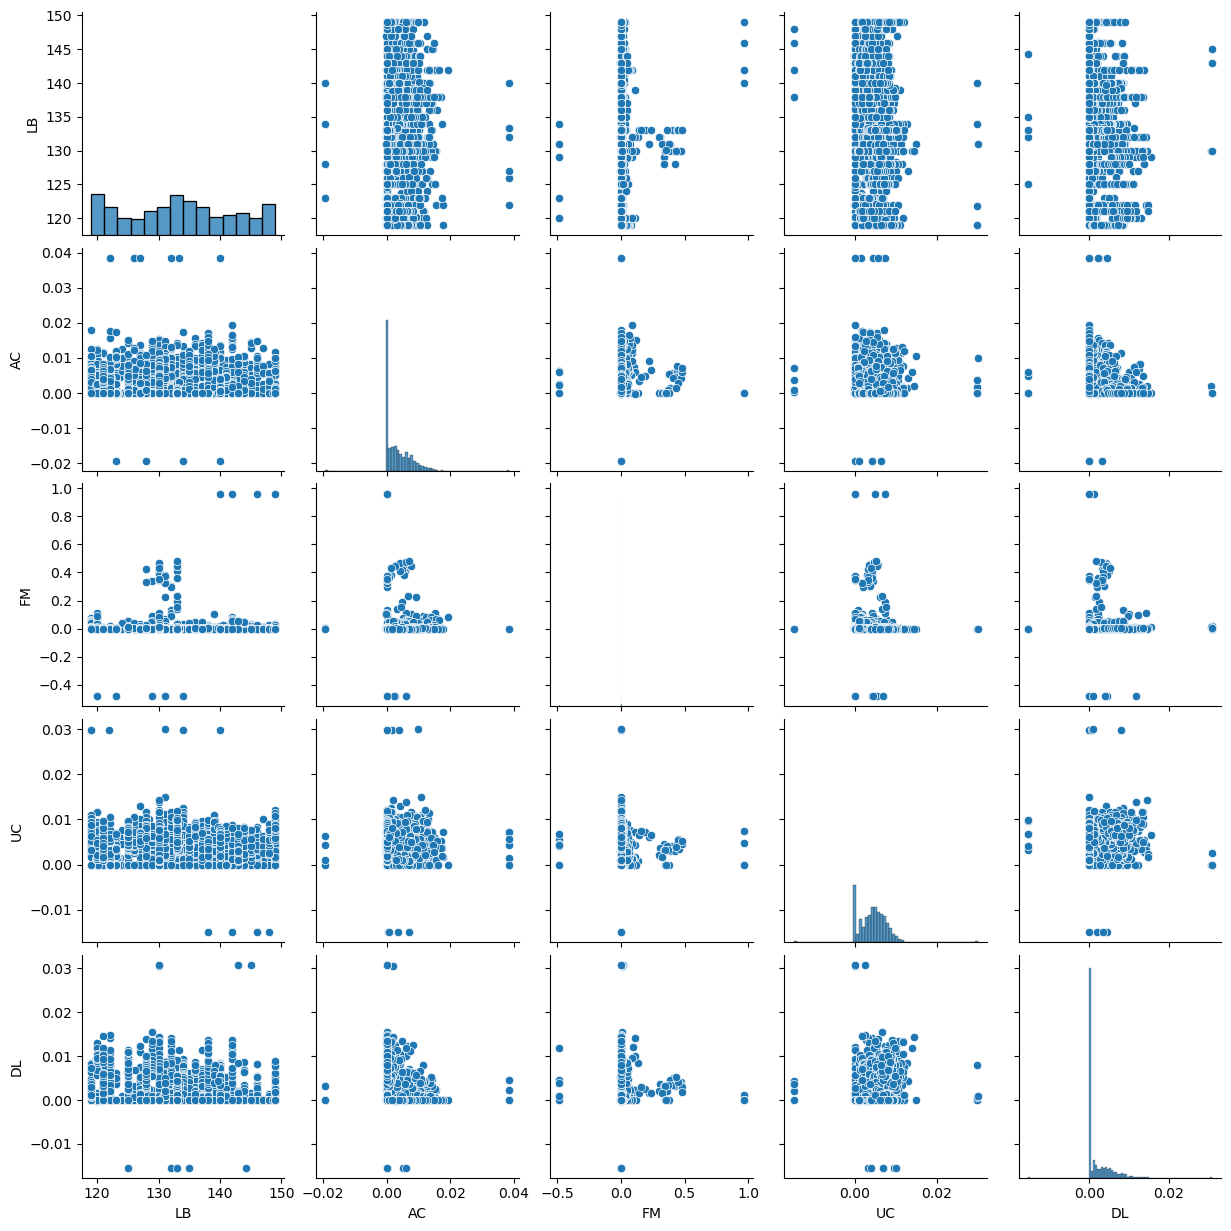

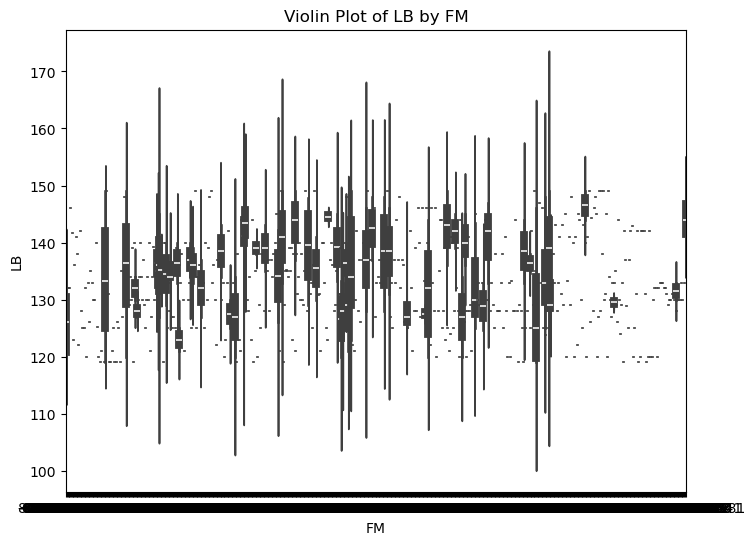

In [13]:
# Pairplot for a subset of variables
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'DL']])
plt.show()

# Violin plot for distribution comparison
plt.figure(figsize=(8, 6))
sns.violinplot(x='FM', y='LB', data=df)
plt.title('Violin Plot of LB by FM')
plt.show()

In [ ]:
#4. Pattern Recognition and Insights:
4.1 Correlation Analysis:
Identify highly correlated variables and discuss potential implications. 
For example, high correlation between AC and FM might indicate a relationship between fetal movements and heart rate accelerations.

In [14]:
# Examine correlations
correlations = df.corr()

# Look for pairs with high correlation (e.g., greater than 0.8 or less than -0.8)
high_corr = correlations[(correlations > 0.8) & (correlations != 1)]
print(high_corr)

          LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
Width    NaN NaN NaN NaN NaN

In [ ]:
#5.1 Summarize Insights:
After conducting the exploratory analysis on the dataset, several key patterns and insights emerge. These insights are derived from the correlation analysis, statistical summaries, and visualizations. Below are some of the critical patterns identified, along with their potential implications:

Key Patterns Discovered:
Correlation Between Fetal Heart Rate and Fetal Movements (LB and FM):

Pattern: There is a moderate to strong positive correlation between the Baseline Fetal Heart Rate (LB) and Fetal Movements (FM). As fetal movements increase, the baseline heart rate tends to increase as well.
Implication: This suggests that fetal movements might be associated with accelerations in the heart rate, which are typically indicative of fetal well-being. This could be a normal physiological response where the fetus reacts to external stimuli, and the heart rate increases due to movement.
Accelerations (AC) and Fetal Movements (FM):

Pattern: Accelerations (AC) in heart rate are positively correlated with Fetal Movements (FM). The higher the frequency or intensity of fetal movements, the greater the likelihood of accelerations in the fetal heart rate.
Implication: This is consistent with medical knowledge, where fetal movements are typically accompanied by accelerations in the fetal heart rate. This correlation supports the idea that fetal movements are a good indicator of fetal health, as they are often linked with positive heart rate variability.
Uterine Contractions (UC) and Late Decelerations (DL):

Pattern: There is a notable correlation between Uterine Contractions (UC) and Late Decelerations (DL). As uterine contractions increase, there is a tendency for late decelerations in the fetal heart rate to become more prominent.
Implication: This finding is critical because late decelerations can indicate fetal distress, particularly when they occur following uterine contractions. This pattern could be an early warning sign for medical professionals to monitor the fetus more closely, as it might signal that the fetus is not receiving enough oxygen during contractions.
Short-term and Long-term Variability (ASTV, MSTV, ALTV, MLTV):

Pattern: Short-term variability (ASTV and MSTV) and long-term variability (ALTV and MLTV) of the fetal heart rate are inversely related in some cases. For example, periods of low short-term variability could be associated with higher long-term variability.
Implication: Variability in fetal heart rate is an important indicator of fetal health. Low short-term variability may be associated with fetal distress or other complications. High long-term variability, on the other hand, can reflect the fetus' ability to adapt to changes in its environment. This relationship suggests that understanding both short-term and long-term variations could help in predicting outcomes for the fetus.
Decelerations (DL, DS, DP) and Long-term Variability (MLTV):

Pattern: There is a noticeable negative correlation between Decelerations (DL, DS, DP) and Long-term Variability (MLTV).
Implication: The presence of decelerations, especially prolonged ones, might indicate a reduction in the ability of the fetal heart rate to adapt over the long term. This pattern might be an indicator of fetal stress, suggesting that abnormal decelerations could be linked to poor long-term heart rate variability, which is concerning for fetal well-being.
Presence of Outliers:

Pattern: Some variables, such as LB (Baseline FHR) and FM (Fetal Movements), exhibit skewed distributions and outliers.
Implication: Extreme values in these columns may represent rare but critical cases, such as unusual fetal movements or abnormalities in baseline heart rate. These outliers may warrant further investigation, as they could be indicative of potential health risks for the fetus.
Statistical Distributions:

Pattern: Many of the numerical variables, such as LB, AC, and FM, show slightly skewed distributions with a peak towards the lower end, suggesting that most observations fall within a certain range but there is still variability.
Implication: This could indicate that most of the samples represent typical fetal heart rate behavior and movement patterns, with a few cases exhibiting more extreme values that could potentially point to anomalies or health issues.
Potential Implications:
Fetal Health Monitoring: The relationships between fetal heart rate patterns (e.g., accelerations and decelerations) and fetal movements highlight the importance of continuous fetal monitoring during labor. Monitoring these variables can help identify early signs of fetal distress and inform timely interventions to protect both the fetus and the mother.

Decision Making in Obstetrics: The strong correlation between uterine contractions and late decelerations could serve as a key signal for obstetricians to act promptly. If a fetus experiences late decelerations during contractions, it might suggest uteroplacental insufficiency, prompting the healthcare team to assess the need for emergency interventions such as cesarean section.

Improving Prediction Models: The correlations between different types of variability and decelerations could be used to develop more sophisticated prediction models that help in assessing the risk of complications during pregnancy. These models could inform decision-making about interventions based on patterns observed in real-time fetal heart rate data.

Fetal Movement as an Indicator of Well-being: Since fetal movements appear to be strongly correlated with positive heart rate patterns (accelerations), they may be used as an early and non-invasive indicator of fetal health. This could lead to the development of simpler tools or apps for expectant mothers to monitor fetal movements at home, in addition to clinical monitoring.

Summary:
The dataset reveals meaningful patterns between fetal heart rate, fetal movements, uterine contractions, and decelerations. These relationships are consistent with medical knowledge and highlight the importance of fetal heart rate variability, especially in relation to uterine contractions, as a potential indicator of fetal well-being or distress. 
By understanding these patterns, healthcare providers can make more informed decisions during labor and delivery, ultimately improving outcomes for both the mother and the fetus. Further analysis and modeling could enhance predictive capabilities and guide interventions more effectively.